# Homework 8

## Instructions
+ Please write you solutions in cells below each problem. Use multiple cells if necessary. 
+ The solutions may be in the form of code, markdown, or a combination of both. Make an effort to present the solutions in a clean fashion.
+ Please submit this notebook in your git repository, under the folder `problemset`. The notebook should be titled DSC495_014_FA22_A8_unityid.ipynb.


For all the plots below: please label each axes, add a legend (where appropriate), and title the plot. All the fontsizes should be at least $14$.


### Problem 0: Project option 

See [this](https://github.ncsu.edu/asaibab/dsc495_014_fall2022/blob/main/materials/proj_proposal.md). If you submitted on time, you get bonus points. If you have not submitted your choice, please let me know ASAP.



### Problem 1: Quadratic functions (5 points)


 (Exercise 7.5 of Langtangen's book) Consider a quadratic function $f(x; a,b,c) = ax^2 + bx + c$. Your tasks are:
1.  Make a class `Quadratic` for representing $f$, where $a, b,$ and $c$ are data attributes, and the methods are

    + `__init__` for storing the attributes $a,b$, and $c$,
    + `value` for computing a value of $f$ at a point $x$,
    + `plot` for plotting the $f$ values in the interval $[L,R]$ at $n$ evenly spaced points,
    + `roots` for computing the two roots (possibly complex).
2. Write good docstrings to document the class `Quadratic`. Type `help(Quadratic)` to print the docstrings. 
3. Write a test function `testQuadratic()` for verifying the implementation of `value` and `roots`. Please generate at least three distinct test cases and compare your results with `numpy.roots`.  


### AKS: Most of you got this correct, so only focussing on the second problem.

### Problem 2: Derived classes (5 points) 

Write a base class called `Circle` with the following methods
+ `__init__` for storing attributes (radius, center)
+ `plot` for plotting the circle
+ `area`, for computing the area of the circle
+ `perimeter` for computing the perimeter of the circle


Then, using `Circle` as a base class, write a derived class called `Ellipse` with the same functionalities. An ellipse is defined by a center, $a$ semi-major axis, and $b$ semi-minor axis.

The area of an ellipse is $\pi a b$, whereas the perimeter of an ellipse is given by the approximate formula (from [wikipedia](https://en.wikipedia.org/wiki/Ellipse))
$$ \text{Perimeter} \approx \pi(a + b) \left( 1 + \frac{3h}{10 + \sqrt{4-3h}} \right) \qquad h = \frac{(a-b)^2 }{(a+b)^2}.$$

Is it better to derive `Ellipse` from `Circle` or vice versa? Briefly discuss.


### AKS: 

Let's first derive an Ellipse from a Circle. The two constructors have very little to do with each other.

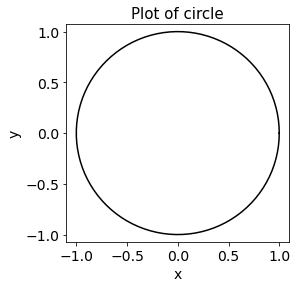

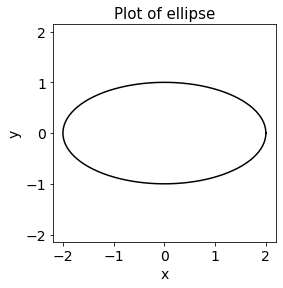

In [10]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


#Some code to beautify the plots
plt.rcParams['figure.figsize'] = [4, 4]
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

class Circle:
    def __init__(self, radius = 1., center = (0,0)):
        self.radius = radius
        self.center = center
        return
    
    def plot(self):
        plt.figure()
        theta = np.linspace(0,2*np.pi, 100)
        r = self.radius
        x = self.center
        plt.plot(x[0] + r*np.cos(theta), x[1] + r*np.sin(theta), 'k-')
        plt.xlabel('x', fontsize = 14)
        plt.ylabel('y', fontsize = 14)
        plt.title('Plot of circle', fontsize = 15)
        plt.axis('equal')
        return
    def perimeter(self):
        return 2*np.pi*self.radius
    def area(self):
        return np.pi*self.radius**2.
    


class Ellipse(Circle):
    def __init__(self, a = 1, b = 1, center = (0,0)):
        self.a = a
        self.b = b
        self.center = center
        return
    
    def plot(self):
        plt.figure()
        theta = np.linspace(0,2*np.pi, 100)
        a = self.a
        b = self.b
        x = self.center
        plt.plot(x[0] + a*np.cos(theta), x[1] + b*np.sin(theta), 'k-')
        plt.xlabel('x', fontsize = 14)
        plt.ylabel('y', fontsize = 14)
        plt.axis('equal')
        plt.title('Plot of ellipse', fontsize = 15)
        return
    def perimeter(self):
        a = self.a
        b = self.b
        h = (a-b)**2./(a+b)**2.
        return np.pi*(a+b)*(1+3*h/(10 + np.sqrt(4-3*h)))
    def area(self):
        return np.pi*self.a*self.b
    
    
c = Circle(1, (0,0))
c.plot()
e = Ellipse(2, 1, (0,0))
e.plot()

### Other way around.

Now let's try to write the other way around, where we derive a Circle from an Ellipse. We are able to reuse most of the original functionalities but modify them where appropriate.

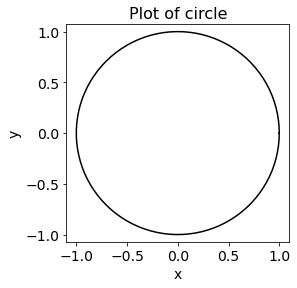

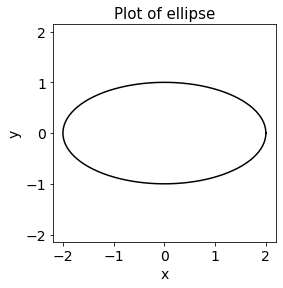

In [11]:
class Ellipse:
    def __init__(self, a = 1, b = 1, center = (0,0)):
        self.a = a
        self.b = b
        self.center = center
        return
    
    def plot(self):
        plt.figure()
        theta = np.linspace(0,2*np.pi, 100)
        a = self.a
        b = self.b
        x = self.center
        plt.plot(x[0] + a*np.cos(theta), x[1] + b*np.sin(theta), 'k-')
        plt.xlabel('x', fontsize = 14)
        plt.ylabel('y', fontsize = 14)
        plt.axis('equal')
        plt.title('Plot of ellipse', fontsize = 15)
        return
    def perimeter(self):
        a = self.a
        b = self.b
        h = (a-b)**2./(a+b)**2.
        return np.pi*(a+b)*(1+3*h/(10 + np.sqrt(4-3*h)))
    def area(self):
        return np.pi*self.a*self.b
    
    
class Circle(Ellipse):
    def __init__(self, radius, center):
        Ellipse.__init__(self, a = radius, b = radius, center = center)
        self.radius = radius
        
    def plot(self):
        Ellipse.plot(self)
        plt.title('Plot of circle', fontsize = 16)
    def perimeter(self):
        return 2*np.pi*self.radius
    
c = Circle(1, (0,0))
c.plot()
e = Ellipse(2, 1, (0,0))
e.plot()

It's clearly easier to derive a Circle from an Ellipse.